## Описание проекта 


В данном проекте используются данные о продажах игр с разных платформ, необходимо выделить потенциально самые популярные и прибыльные платформы для интернет-магазина игр.

***Описание данных***

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
    Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
    им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Знакомство с данными

In [482]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

In [483]:
data = pd.read_csv('games.csv')
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [484]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [485]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


***Вывод***

Первичное знакомство показало, что:
* в некоторых столбцах имеются пропуски;
* заголовки в таблице написаны не в змеином регистре;
* тип данных в `User_Score` не числовой, что странно; 

## Подготовка данных

В данной главе мы:
* приведем названия столбцов к змеиному регистру;
* проверим данные на наличие дупликатов;
* изменим типы данных на более подходящие;
* обработаем пропуски;
* посчитаем суммарные продажи по всем регионам и запишем их в отдельный столбец.

### Изменение названий столбцов

Приведём названия столбцов к змеиному регистру:

In [486]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Так как все ошибки связаны только с регистром, просто приведём все названия к нижнему регистру:

In [487]:
data.columns = data.columns.str.lower()

In [488]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Поиск дупликатов

Явные дупликаты:

In [489]:
data.duplicated().sum()

0

In [490]:
data['name'].value_counts()

Need for Speed: Most Wanted     12
FIFA 14                          9
Ratatouille                      9
Madden NFL 07                    9
LEGO Marvel Super Heroes         9
                                ..
Shin Sangoku Musou 5 Empires     1
Fairy Fencer F                   1
Mega Man 64                      1
Darkened Skye                    1
Sega Rally Championship          1
Name: name, Length: 11559, dtype: int64

In [491]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [492]:
data.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


Обнаружено много дупликатов в названиях игр, связано это с тем, что игры выходили на разных платформах, а также, в случае `'Need for Speed: Most Wanted'`, потому что игра выходила с одинаковым название 2 раза.

Неявные дупликаты:

In [493]:
columns = ['name', 'platform', 'genre', 'rating']

for column in columns:
    print(data[column].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Неявных дупликатов не обнаружено.

### Изменение типов данных

В данном случае нет смысла переводить столбец с годом выпуска к формату `datetime`.

Посчитаем сколько памяти занимает таблица:

In [494]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [495]:
# функция для смены типа данных в столбцах с целыми и вещественными числовыми значениями
def type_change(data):    
    for column in data.columns:
        if data[column].dtype == 'int64':
            data[column] = pd.to_numeric(data[column], downcast='integer')
        elif data[column].dtype == 'float64':
            data[column] = pd.to_numeric(data[column], downcast='float')
    return data        


data = type_change(data)
print(data.dtypes)

name                object
platform            object
year_of_release    float32
genre               object
na_sales           float32
eu_sales           float32
jp_sales           float32
other_sales        float32
critic_score       float32
user_score          object
rating              object
dtype: object


In [496]:
data['genre'].astype('category')

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: genre, Length: 16715, dtype: category
Categories (12, object): [Action, Adventure, Fighting, Misc, ..., Shooter, Simulation, Sports, Strategy]

In [497]:
data['year_of_release'].isna().sum()

269

In [498]:
data['year_of_release'] = data['year_of_release'].astype('Int16')

In [499]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int16
genre              16713 non-null object
na_sales           16715 non-null float32
eu_sales           16715 non-null float32
jp_sales           16715 non-null float32
other_sales        16715 non-null float32
critic_score       8137 non-null float32
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int16(1), float32(5), object(5)
memory usage: 5.2 MB


Столбец `'rating'` приведём к типу `category` после обработки результатов.

### Обработка пропусков

Посчитаем количество и относительную долю пропусков в каждом из столбцов:

In [500]:
for column in data.columns:
    print(f'В {data[column].name} {data[column].isna().sum()} пропусков.')
    print(f'Доля от всех равна {data[column].isna().sum() / data[column].shape[0] * 100}%')

В name 2 пропусков.
Доля от всех равна 0.011965300628178284%
В platform 0 пропусков.
Доля от всех равна 0.0%
В year_of_release 269 пропусков.
Доля от всех равна 1.609332934489979%
В genre 2 пропусков.
Доля от всех равна 0.011965300628178284%
В na_sales 0 пропусков.
Доля от всех равна 0.0%
В eu_sales 0 пропусков.
Доля от всех равна 0.0%
В jp_sales 0 пропусков.
Доля от всех равна 0.0%
В other_sales 0 пропусков.
Доля от всех равна 0.0%
В critic_score 8578 пропусков.
Доля от всех равна 51.31917439425665%
В user_score 6701 пропусков.
Доля от всех равна 40.08973975471134%
В rating 6766 пропусков.
Доля от всех равна 40.478612025127134%


В столбцах `'critic_score', 'user_score', 'rating'` количество пропусков высоко, просто удалив их, мы потеряем половину таблицы, исследуем их:

In [501]:
data.query('critic_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,NaN,NaN,NaN


In [502]:
data.query('critic_score.isna()')['user_score'].isna().sum()

6663

In [503]:
data.query('critic_score.isna()')['rating'].isna().sum()

6683

Заполним пропуски в столбце `'rating'` на `none`, чтобы в дальнейшем учесть эти пропуски при анализе:

In [504]:
data['rating'] = data['rating'].fillna('none')
data['rating'] = data['rating'].astype('category')


Как видно, практически везде, где есть пропуски `'critic_score'`, есть пропуски и в двух других столбцах, возможно, это связано с определенными платформами:

In [505]:
data.query('critic_score.isna()')['platform'].value_counts()

DS      1434
PS       997
PS2      863
PSP      747
Wii      735
PS3      511
GBA      384
3DS      352
X360     346
N64      319
PSV      310
PC       259
SNES     239
SAT      173
PS4      140
2600     133
GC       108
XB        99
GB        98
NES       98
XOne      78
WiiU      57
DC        38
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Пропуски встречаются практически в каждой платформе.

In [506]:
data.query('critic_score.isna()')['year_of_release'].value_counts().reset_index().sort_values(by='index')

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
30,1983,17
33,1984,14
35,1985,13
28,1986,21
31,1987,16
34,1988,14
29,1989,17


Пропуски встречаются в любой год, относительно равномерно.

Проверим пропуски по жанрам:

In [507]:
data.query('critic_score.isna()')['genre'].value_counts()

Action          1479
Misc            1227
Sports          1154
Adventure        980
Role-Playing     761
Simulation       521
Racing           507
Fighting         440
Platform         391
Strategy         381
Shooter          379
Puzzle           356
Name: genre, dtype: int64

Практически во всех жанрах есть пропуски.

In [508]:
for genre_name in data['genre'].unique():
    print(genre_name)
    print(data.query('genre == @genre_name')['critic_score'].describe())

Sports
count    1194.000000
mean       71.968178
std        13.878432
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: critic_score, dtype: float64
Platform
count    497.000000
mean      68.058350
std       13.213759
min       19.000000
25%       59.000000
50%       69.000000
75%       77.000000
max       97.000000
Name: critic_score, dtype: float64
Racing
count    742.000000
mean      67.963615
std       14.248234
min       13.000000
25%       59.000000
50%       69.000000
75%       79.000000
max       96.000000
Name: critic_score, dtype: float64
Role-Playing
count    737.000000
mean      72.652649
std       11.999835
min       35.000000
25%       65.000000
50%       74.000000
75%       82.000000
max       96.000000
Name: critic_score, dtype: float64
Puzzle
count    224.000000
mean      67.424110
std       12.735444
min       25.000000
25%       60.750000
50%       70.000000
75%       76.000000
max       90.000000
Name: cri

In [509]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,none
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,none


Всего два пропуска.

In [510]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,none
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,none


Всего два пропуска и они совпадают с годом и платформой, пропуски в тех же строках что и в названии.

In [511]:
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,none
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,none
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,none


В пропусках с годом выхода игры, как мы видим, пропуски есть в разных регионах, жанрах, но их количество менее 2х % от количества строк, посмотрим какие платформы с пропусками: 

In [512]:
data.query('year_of_release.isna()').groupby('platform')['platform'].count()

platform
2600    17
3DS      8
DS      30
GB       1
GBA     11
GC      14
N64      3
PC      17
PS       7
PS2     34
PS3     25
PSP     16
PSV      1
Wii     34
X360    30
XB      21
Name: platform, dtype: int64

Как видно, пропуски есть во многих платформах, но, стоит отметить, что большая часть из них в неактуальных старых плаптформах, типо PS2, DS. Их количество также не велико, поэтому оставляем.

Основная масса пропусков в 3-х столбцах с рейтингом и оценками, анализ показал, что эти пропуски хоть и идут практически вместе, но тем не менее они случайны - мы не можем заполнить их достоверными сведениями. Заполнение пропусков средним значением или медианой приведёт к искажению распределения, даже, если мы немного увеличим точность, заполнив средними по жанру или платформе, достоверность такого заполнения довольно низкая. Учитывая, что по оценкам в дальнейшим нужно будет проверять гипотезы, искажение данных может привести к ошибкам. При проверке гипотез, строки с пропусками просто удалим, а пока оставим, потому что данные в других столбцах нам пригодятся. Пропуски в столбце `'rating'` были заменены на `'none'`. Пропуски в столбцах  `'name'`, `'genre'` совпадают, их всего 2 поэтому можно не трогать,  , `'year_of_release'` - пропуски в основном по старым платформам - можно оставить. 

### Столбец user_score

В столбце `user_score` тип данных object. Это означает, что в столбце есть, что-то кроме чисел:

In [513]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди чисел и `nan` встречается `'tbd'`. `'tbd'` с английского -подлежит уточнению, то есть фактически это пропуск.

Заменим `tbd` на `np.nan`:

In [514]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [515]:
data['user_score'].isna().sum()

9125

In [516]:
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [517]:
data['user_score'] = data['user_score'].astype('float32')

### Расчёт суммарных продаж по всем регионам

In [518]:
data['total_sales'] = data [['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [519]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,none,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,none,31.380001


### Вывод

В ходе подготовки данных:
* Названия столбцов были приведены к змеиному регистру;
* дупликаты не были обнаружны;
* были оптимизированы типы данных;
* было решено оставить пропуски, чтобы не потерять лишние данные, и не заполнять их, чтобы не искажать общую картину;
* в столбце `'user_score'` значение `'tbd'` фактически означает пропуск, эти значения были заменены на `np.nan`;
* посчитаны суммарные продажи по всем регионам для каждой игры.

## Исследовательский анализ данных

В этой главе мы:
* проведём анализ выпуска игр по годам;
* проведём анализ платформ;
* выделим актуальный для анализа период;
* проанализируем платформы за актуальный период.

### Анализ выпуска новых игр по годам

In [520]:
data_games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

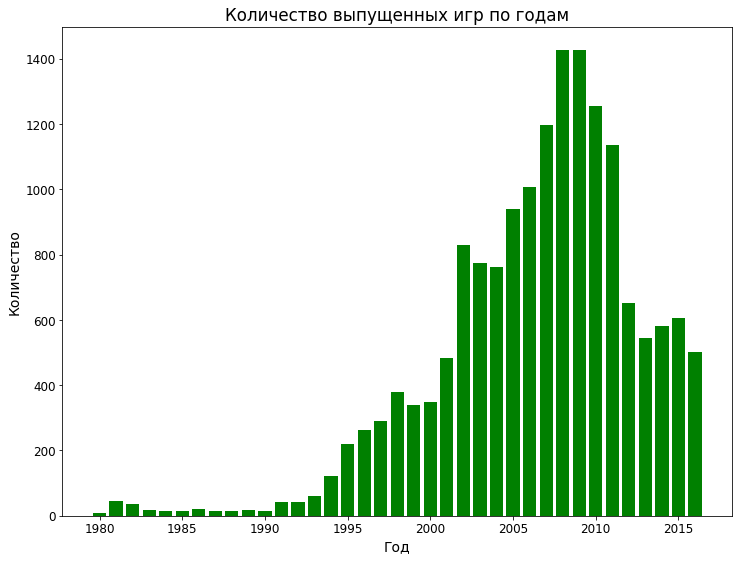

In [521]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_title('Количество выпущенных игр по годам')
ax1.set_xlabel('Год')
ax1.set_ylabel('Количество')
              

ax1.bar(data_games_per_year.index, data_games_per_year['name'], color='green')

plt.show()

#### Вывод

* Из графика видно, что пик количества выпускаемых игр пришёлся на 2008-2009 годы;
* количество игр, выпущенных до 1995 года исчезающе мало;
* начиная с 2012 года количество выпускаемых игр было примерно одинаково в каждый год.


### Анализ платформ

Выберем платформы с наибольшими суммарными продажами:

In [522]:
data_platforms = (
    data.pivot_table(index='platform',  values='total_sales', aggfunc='sum').
    sort_values(by='total_sales', ascending=False)
)

In [523]:
data_platforms

,total_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.649963
Wii,907.510010
DS,806.119995
PS,730.859985
GBA,317.850006
PS4,314.140015
PSP,294.049988


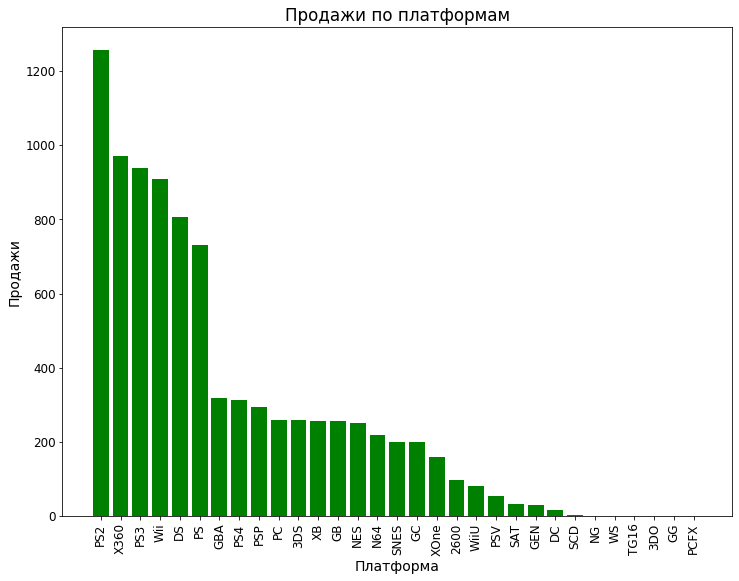

In [524]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_title('Продажи по платформам')
ax1.set_xlabel('Платформа')
ax1.set_ylabel('Продажи')
              

ax1.bar(data_platforms.index, data_platforms['total_sales'], color='green')
plt.xticks(rotation='90')

plt.show()

Можно выделить 6 самых крупных платформ:

In [525]:
big_platform = data_platforms.head(6)
big_platform

,total_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.649963
Wii,907.510010
DS,806.119995
PS,730.859985


Добавим столбец, в котором отметим только самые крупные платформы, остальные пометим как `'Другие'`.

In [526]:
data['big_platform'] = (
    data['platform']
    .where(data['platform'].isin(big_platform.index), 'Другие')
)

In [527]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,big_platform
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993,Wii
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,none,40.240002,Другие
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000,Wii
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000,Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,none,31.380001,Другие


In [528]:
data['big_platform'].value_counts()

Другие    7293
PS2       2161
DS        2151
PS3       1331
Wii       1320
X360      1262
PS        1197
Name: big_platform, dtype: int64

Создадим сводную таблицу, в которой для каждой из самых крупных платформ будут посчитаны продажи по годам:

In [529]:
big_platforms_year =  (
    data.pivot_table(index=['year_of_release', 'big_platform'],  values='total_sales', aggfunc='sum')
    .reset_index()
)

In [530]:
big_platforms_year

,year_of_release,big_platform,total_sales
0,1980,Другие,11.380000
1,1981,Другие,35.680000
2,1982,Другие,28.879999
3,1983,Другие,16.799999
4,1984,Другие,50.349998
...,...,...,...
99,2015,Другие,238.059998
100,2016,PS3,3.600000
101,2016,Wii,0.180000
102,2016,X360,1.520000


Выведем графики продаж самых крупных платформ по годам:

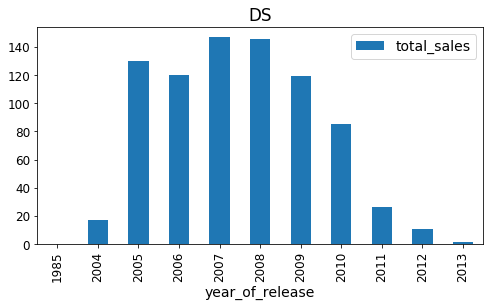

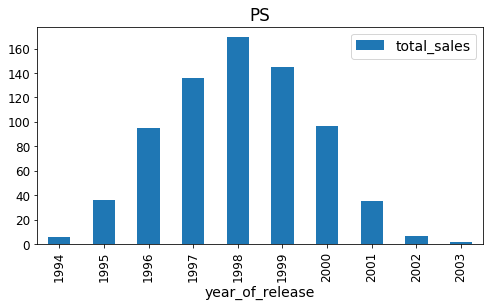

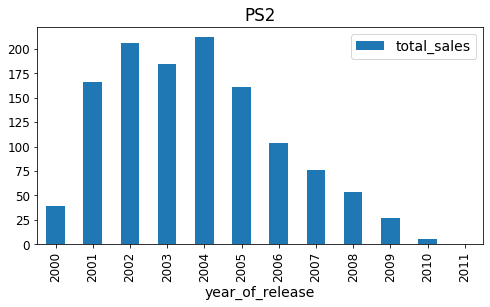

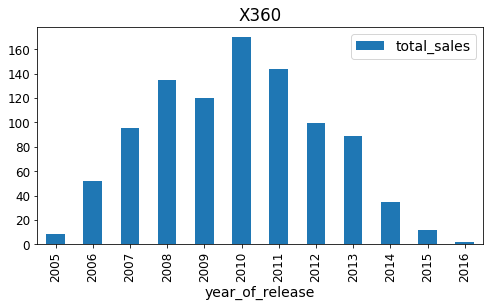

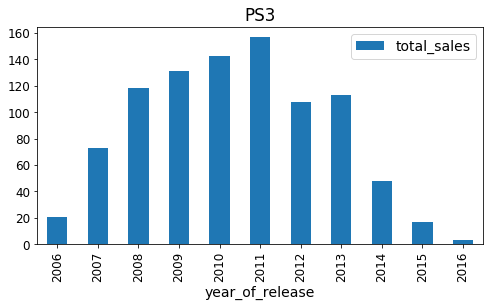

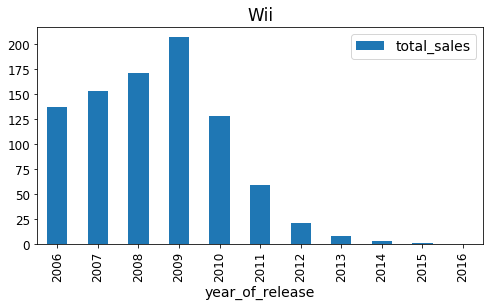

In [531]:
for platform in big_platforms_year['big_platform'].unique():
    if platform != "Другие":
        (big_platforms_year.query('(big_platform == @platform)')
        .plot(kind='bar', x='year_of_release', y='total_sales', title=platform, figsize=(8,4))
        )

#### Вывод


Из графиков видно, что среднее время жизни платформы составляет в среднем около 10 лет. При этом значимый объем продаж в среднем это 8 лет. Как правило, в первый и последний год продажи очень низкие.

### Выделение актуального периода

Как видно из графиков выше после 2011 года был резкий спад по выпускаемым играм, далее более менее равномерное распределение по годам, не было ярко выраженного роста или падения, поэтому актуальным будем считать период с 2012 года включительно.

In [532]:
data_actual = (data.loc[data['year_of_release'] >= 2014, :].copy())

In [533]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,big_platform
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,none,14.630000,Другие
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001,Другие
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,none,11.680000,Другие
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000,Другие
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,none,7.980000,Другие


#### Вывод

За актуальный период приянт период с 2014 года.

### Анализ платформ за актуальный период

Посмотрим какие платформы лидируют по продажам:

In [534]:
actual_sales_stat = (data_actual
                     .pivot_table(index=['platform','year_of_release'],
                                    values='total_sales',
                                    aggfunc='sum'
                                           )
                     .reset_index()
                     .sort_values(by='year_of_release')
                    )

In [535]:
actual_sales_stat.head()

,platform,year_of_release,total_sales
0,3DS,2014,43.759998
26,XOne,2014,54.070000
23,X360,2014,34.740002
20,WiiU,2014,22.030001
17,Wii,2014,3.750000


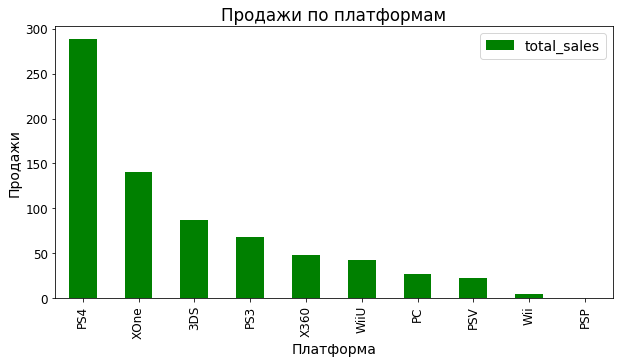

In [536]:
fig, ax = plt.subplots()

(actual_sales_stat.pivot_table(index='platform',
                              values='total_sales',
                              aggfunc='sum')
                .sort_values(by='total_sales', ascending=False)
                .plot(kind='bar',
                      title='Продажи по платформам',
                      color='green',
                      figsize=(10,5), ax=ax)
)

ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи')

plt.show()

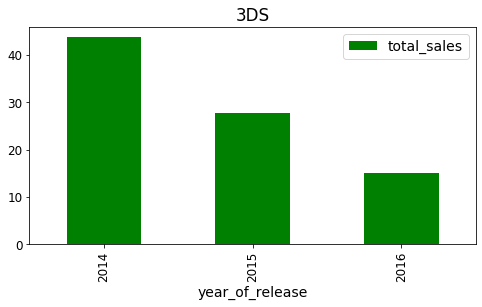

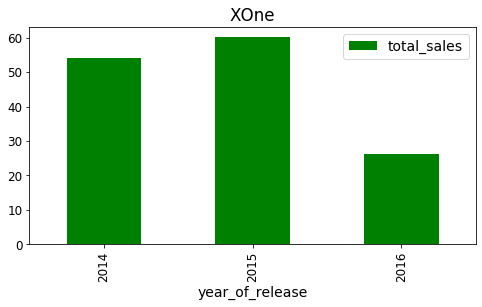

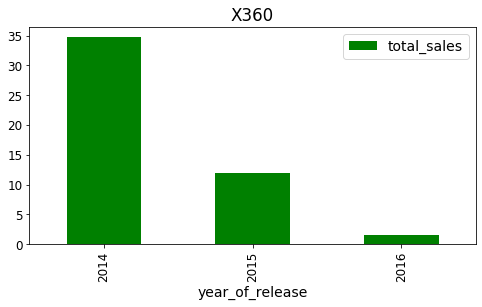

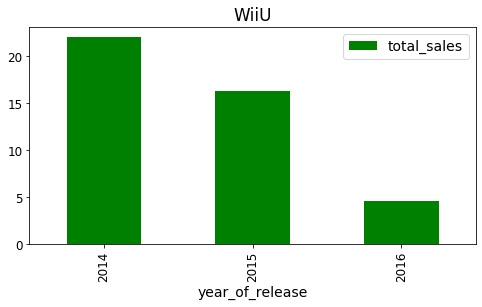

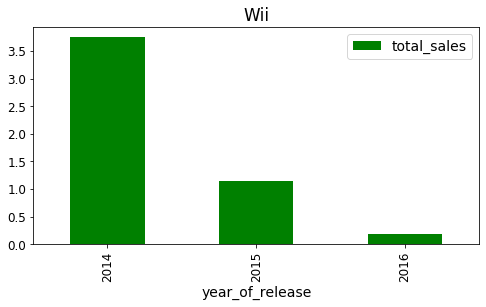

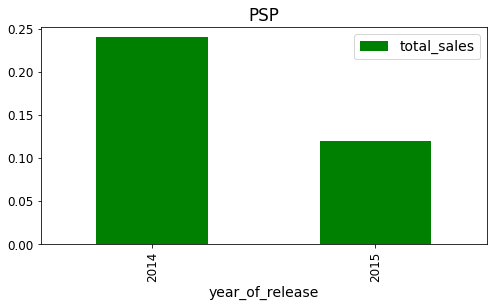

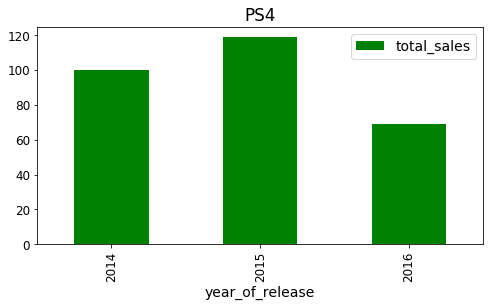

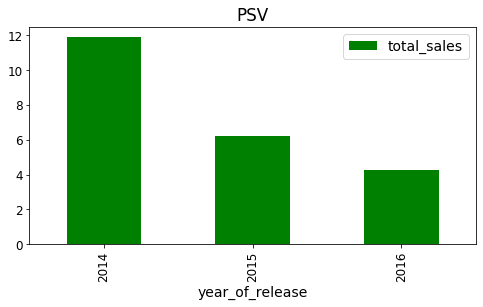

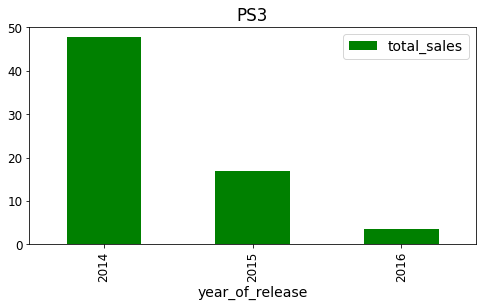

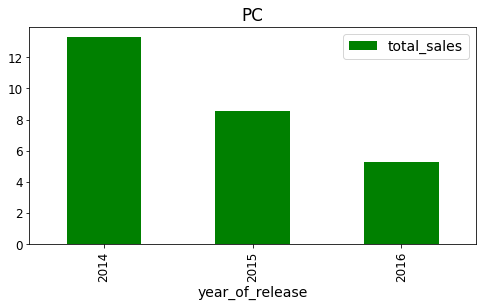

In [537]:
for platform in actual_sales_stat['platform'].unique():
    (actual_sales_stat.query('(platform == @platform)')
    .plot(kind='bar', x='year_of_release', y='total_sales', title=platform, color='green', figsize=(8,4))
    )

* Можно выделить платформы, которые находятся в завершающей стадии жизненного цикла, это:
    * Wii, продажи за 2016 год исчезающе малы;
    * PSP;
    * PS3;
    * X360;
* Учитывая, что данные неполные и продажи за 2016 год занижены, а также, приняв во внимание жизненный цикл платформы в 10 лет, мы видим, что в 2015 относительно 2014 года был стремительный рост, поэтому платформы PS4 и Xbox One находятся, вероятно, в растущей или пиковой стадии развития и на следующий год можно ожидать прироста продаж;
* остальные платформы, судя по графикам, находятся в нисходящем тренде, хотя и здесь не так однозначно, потому что, если учесть, что данные неполные, то такие платформы как PC и PSV могут показать относительно высокие продажи.
* платформы, у которых можно ожидать относительно высокие продажи:
    * PS4;
    * XOne;
    * 3DS;
    * PC;
    * PSV;
    * WiiU;

Построим совместную столбчатую диаграмму для наиболее перспективных платформ, чтобы сравнить их относительно друг друга:

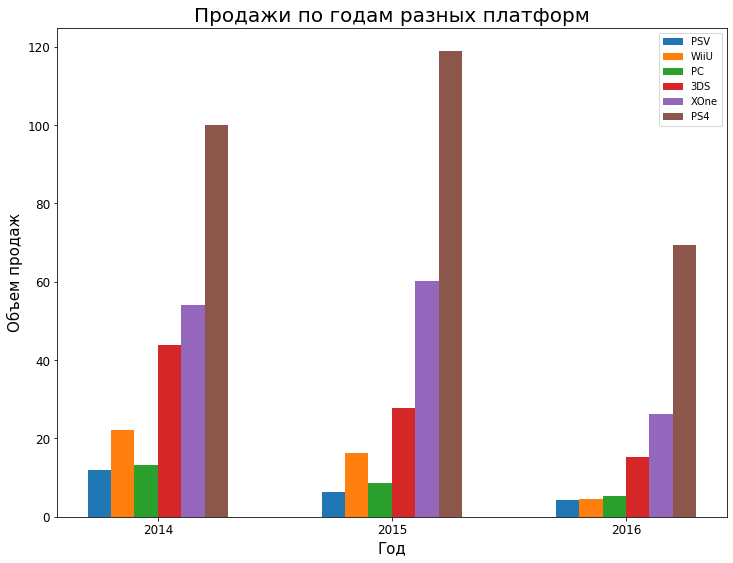

In [538]:
platforms = ['PSV', 'WiiU', 'PC', '3DS', 'XOne', 'PS4'] # платформы, которые хотим сравнить

fig, ax = plt.subplots(figsize=(12, 9))

width = 0.1 # ширина столбца
x = len(platforms) * width # ширина набора столбцов
y = np.arange((-x / 2) + (width / 2), (x / 2), width) # массив значений для сдвига столбцов

for index in range(len(platforms)):
        ax.bar(actual_sales_stat[actual_sales_stat['platform'] == platforms[index]].reset_index()['year_of_release'] + y[index]
       ,actual_sales_stat[actual_sales_stat['platform'] == platforms[index]].reset_index()['total_sales'],
       width = width,
       label=platforms[index]
       )

ax.legend(fontsize=10)
ax.set_title('Продажи по годам разных платформ',
            fontsize=20)
ax.set_xlabel('Год',
             fontsize=15)
ax.set_ylabel('Объем продаж',
             fontsize=15)
plt.xticks((2014, 2015, 2016))

plt.show()

Можно выделить платформы с относительно большим количеством продаж:
* PS4;
* XOne;
* 3DS
* PC;
* WiiU
* PSV.

Среди них наиболее выделяются по объему:
* PS4 - абсолютный лидер;
* XOne - приблизительно вдвое меньше PS4;
* 3DS - приблизительно втрое меньше PS4.

#### Вывод

* Можно выделить платформы, которые находятся в завершающей стадии жизненного цикла, это:
    * Wii, продажи за 2016 год исчезающе малы;
    * PSP;
    * PS3;
    * X360;
* Учитывая, что данные неполные и продажи за 2016 год занижены, а также, приняв во внимание жизненный цикл платформы в 10 лет, мы видим, что в 2015 относительно 2014 года был стремительный рост, поэтому платформы PS4 и Xbox One находятся, вероятно, в растущей или пиковой стадии развития и на следующий год можно ожидать прироста продаж или таких же высоких;
* остальные платформы, судя по графикам, находятся в нисходящем тренде, хотя и здесь не так однозначно, потому что, если учесть, что данные неполные, то такие платформы как PC и PSV могут показать относительно высокие продажи.
* платформы, у которых можно ожидать относительно высокие продажи:
    * PS4;
    * XOne;
    * 3DS;
    * PC;
    * PSV;
    * WiiU;
* лидеры по объему среди них:
    * PS4 - абсолютный лидер;
    * XOne - приблизительно вдвое меньше PS4;
    * 3DS - приблизительно втрое меньше PS4.

### «Ящик с усами» по глобальным продажам игр в разбивке платформам

По актуальному периоду посмотрим на распределение продаж по жанрам с помощью графика "Ящик с усами":

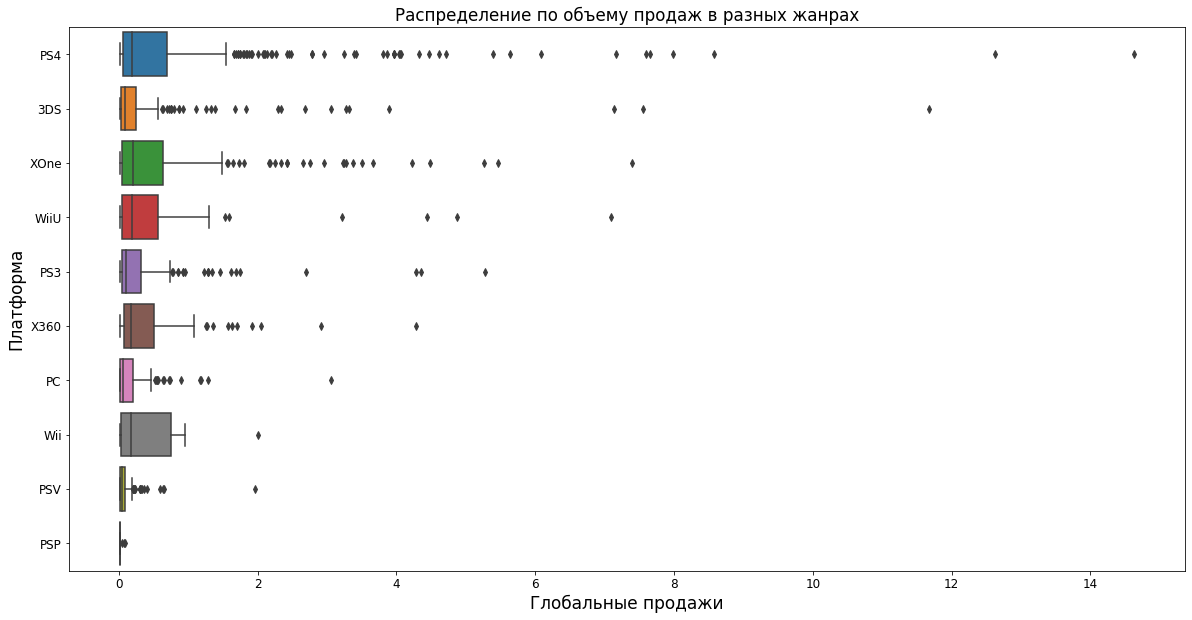

In [539]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y=data_actual['platform'], x=data_actual['total_sales'], ax=ax)
ax.set_xlabel('Глобальные продажи', fontsize=17)
ax.set_ylabel('Платформа', fontsize=17)
ax.set_title('Распределение по объему продаж в разных жанрах')
plt.show()

Как можно увидеть, практически во всех платформах есть игры с аномально высокими продажами, их продажи в десятки раз превышают медианные. Из-за них не видно более нормальную область, около самого ящика, построим этот же график, но с ограничением продаж в 2 млн:

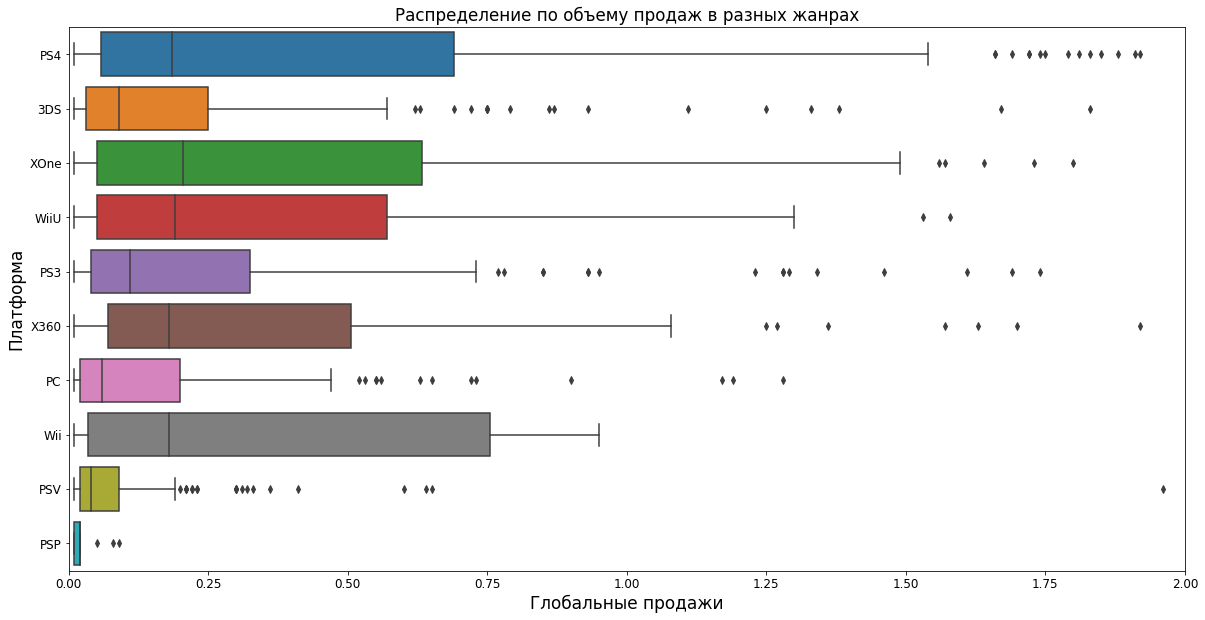

In [540]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y=data_actual['platform'], x=data_actual['total_sales'], ax=ax)
ax.set_xlabel('Глобальные продажи', fontsize=17)
ax.set_ylabel('Платформа', fontsize=17)
ax.set_title('Распределение по объему продаж в разных жанрах')
plt.xlim(0, 2)
plt.show()

#### Вывод

Здесь мы видим, что распределение продаж у всех платформ  - распределение Пуассона. При этом у наиболее популярных платформ разброс, естественно, выше, встречаются супер хиты, которые во много раз превышают медианные продажи.

Большая часть игр продаётся тиражом не более 1,5 млн копий по всему миру. Медиана же как правило не больше 0.25 млн.

75% игр расходится в среднем тиражом не более 0,75 млн на самых популярных платформах.

Можно выделить платформы с наибольшими медианными продажами, возьмём только самые крупные, из прошлого анализа:

* PS4;
* XOne;
* WiiU;

### Влияние на продажи на платформе PS4 отзывов пользователей и критиков

Коэффициент корелляции пирсона равен: 0.40266140969679737


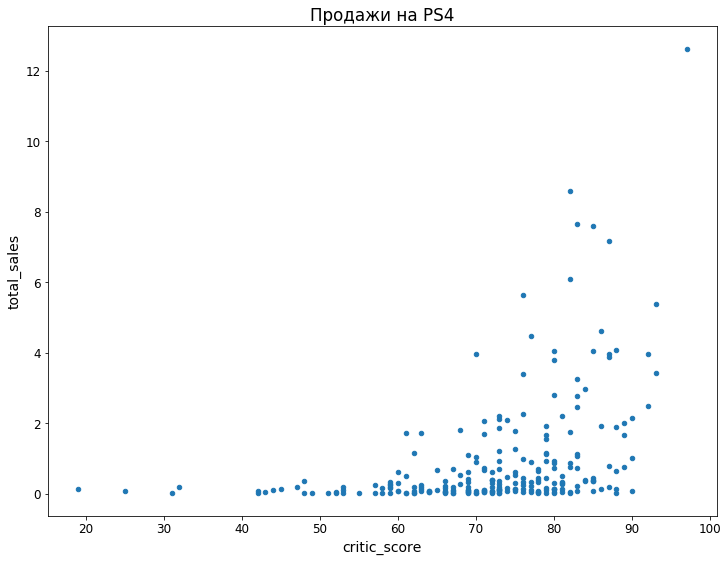

In [541]:
data_actual.query('platform == "PS4"').plot(kind='scatter',
                                            x='critic_score',
                                            y='total_sales',
                                           title='Продажи на PS4')
corr_coef = (data_actual.query('platform == "PS4"')["critic_score"]
             .corr(data_actual.query('platform == "PS4"')["total_sales"]))
print(f'Коэффициент корелляции пирсона равен: {corr_coef}')

Коэффициент корелляции пирсона равен: -0.04013158656330139


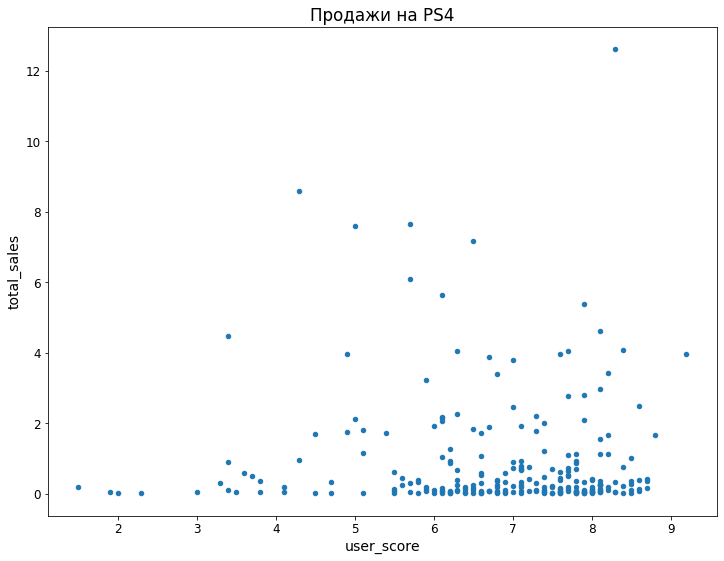

In [542]:
data_actual.query('platform == "PS4"').plot(kind='scatter',
                                            x='user_score',
                                            y='total_sales',
                                           title='Продажи на PS4')
corr_coef = (data_actual.query('platform == "PS4"')["user_score"]
             .corr(data_actual.query('platform == "PS4"')["total_sales"]))
print(f'Коэффициент корелляции пирсона равен: {corr_coef}')

#### Вывод


* Есть слабая корреляция между отзывами критиков и количеством продаж игр на платформе PS4;
* корреляция между оценкой пользователей и количеством продаж - отсутствует.
* в основном большие продажи есть у игр с оценкой критиков больше 70.

### Влияние на продажи на других платформах отзывов пользователей и критиков

Коэффициент корелляции пирсона равен: 0.3094740032433889


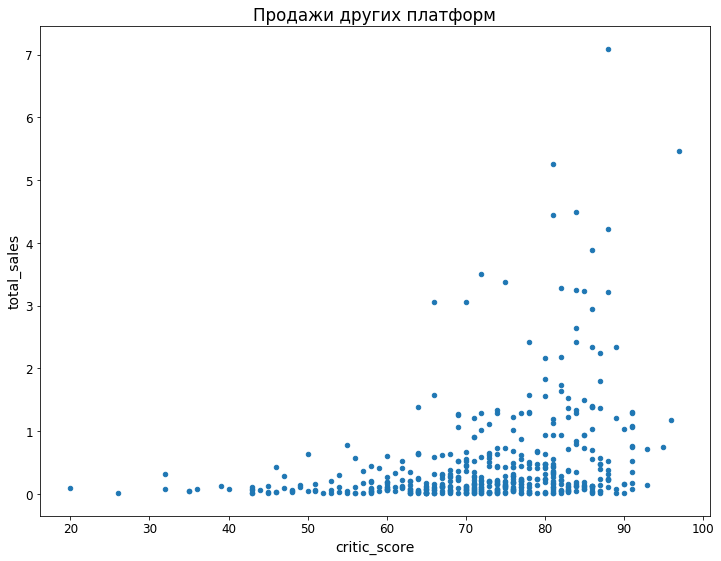

In [543]:
data_actual.query('platform != "PS4"').plot(kind='scatter',
                                            x='critic_score',
                                            y='total_sales',
                                           title='Продажи других платформ')
corr_coef = (data_actual.query('platform != "PS4"')['critic_score']
             .corr(data_actual.query('platform != "PS4"')['total_sales']))
print(f'Коэффициент корелляции пирсона равен: {corr_coef}')

Коэффициент корелляции пирсона равен: -0.0234781943570119


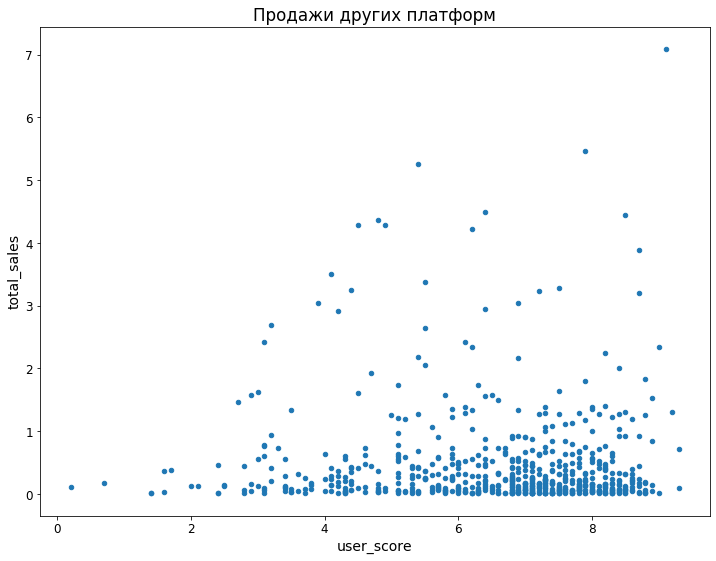

In [544]:
data_actual.query('platform != "PS4"').plot(kind='scatter',
                                            x='user_score',
                                            y='total_sales',
                                           title='Продажи других платформ')
corr_coef = (data_actual.query('platform != "PS4"')['user_score']
             .corr(data_actual.query('platform != "PS4"')['total_sales']))
print(f'Коэффициент корелляции пирсона равен: {corr_coef}')

#### Вывод

Так же как и на PS4 продажи на других платформах немного коррелируют с отзывами критиков, чем выше оценка - тем выше продажи, но, игры с высокими показателями продаж встречаются, в основном, при оценке критиков выше 70. Корреляция с оценками пользователей практически отсутствует.

### Распределение игр по жанрам

Сделаем сводную таблицу с играми по жанрам:

In [545]:
genre_stat = (data_actual
 .pivot_table(index='genre',
              values='name',
              aggfunc='count')
 .sort_values(by='name',
              ascending=False).reset_index()
)


In [546]:
genre_stat

,genre,name
0,Action,619
1,Role-Playing,221
2,Adventure,185
3,Sports,161
4,Shooter,128
5,Misc,113
6,Racing,69
7,Fighting,60
8,Simulation,44
9,Platform,38


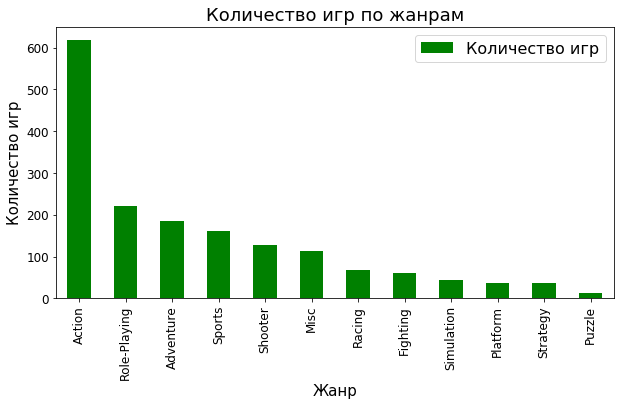

In [547]:
fig, ax = plt.subplots(figsize=(10, 5))
genre_stat.plot(kind='bar', x='genre', y='name', color='green', ax=ax, label='Количество игр')
ax.set_xlabel('Жанр',
             fontsize=15)
ax.set_ylabel('Количество игр',
             fontsize=15)
ax.set_title('Количество игр по жанрам',
            fontsize=18)
ax.legend(fontsize=16)

plt.show()

Как видно, больше всего игр выпускается в жанре Action, меньше всего в жанре Puzzle.

Создадим сводную таблицу по продажам на жанр:

In [548]:
genre_stat_sales = (data_actual
 .pivot_table(index='genre',
              values='total_sales',
              aggfunc='sum')
 .sort_values(by='total_sales',
              ascending=False).reset_index()
)

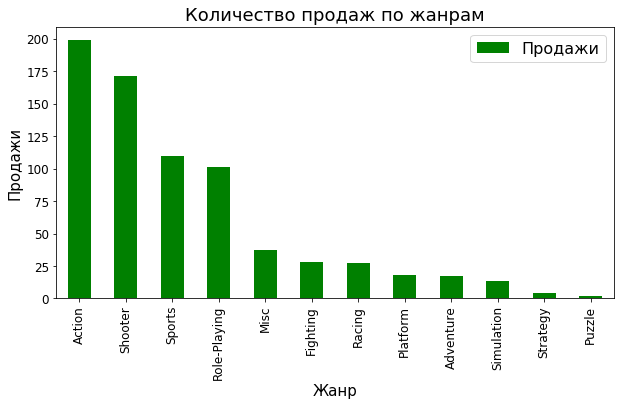

In [549]:
fig, ax = plt.subplots(figsize=(10, 5))
genre_stat_sales.plot(kind='bar', x='genre', y='total_sales', color='green', ax=ax, label='Продажи')
ax.set_xlabel('Жанр',
             fontsize=15)
ax.set_ylabel('Продажи',
             fontsize=15)
ax.set_title('Количество продаж по жанрам',
            fontsize=18)
ax.legend(fontsize=16)

plt.show()

Как видно, разница между продажами Action и Shooter здесь не такая большая как разница в количестве выпускаемых игр. Имеет смысл посмотреть на прибыльность отдельной игр в среднем по жанру:

Объединим таблицы с количеством игр и количеством продаж:

In [550]:
genre_stat_sales = genre_stat_sales.merge(genre_stat, on='genre')
genre_stat_sales

,genre,total_sales,name
0,Action,199.360001,619
1,Shooter,170.940002,128
2,Sports,109.480003,161
3,Role-Playing,101.440002,221
4,Misc,37.549999,113
5,Fighting,28.219999,60
6,Racing,27.520000,69
7,Platform,18.090000,38
8,Adventure,17.549999,185
9,Simulation,13.130000,44


Посчитаем сколько продаж на одну игру приходится в среднем в млн и построим график:

In [551]:
def mean_sales(data):
    return (data['total_sales']) / (data['name'])

genre_stat_sales['mean_sales_per_game'] = genre_stat_sales.apply(mean_sales, axis=1)

In [552]:
genre_stat_sales

,genre,total_sales,name,mean_sales_per_game
0,Action,199.360001,619,0.322068
1,Shooter,170.940002,128,1.335469
2,Sports,109.480003,161,0.680000
3,Role-Playing,101.440002,221,0.459005
4,Misc,37.549999,113,0.332301
5,Fighting,28.219999,60,0.470333
6,Racing,27.520000,69,0.398841
7,Platform,18.090000,38,0.476053
8,Adventure,17.549999,185,0.094865
9,Simulation,13.130000,44,0.298409


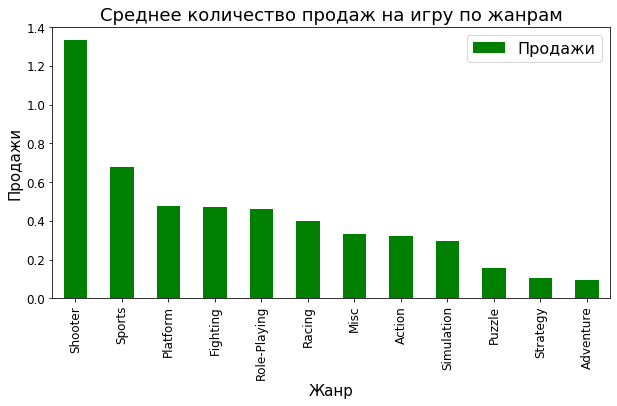

In [553]:
fig, ax = plt.subplots(figsize=(10, 5))
(genre_stat_sales.sort_values(by='mean_sales_per_game', ascending=False).plot(kind='bar',
                       x='genre',
                       y='mean_sales_per_game',
                       color='green',
                       ax=ax,
                       label='Продажи')
)
ax.set_xlabel('Жанр',
             fontsize=15)
ax.set_ylabel('Продажи',
             fontsize=15)
ax.set_title('Среднее количество продаж на игру по жанрам',
            fontsize=18)
ax.legend(fontsize=16)

plt.show()

#### Вывод

* Наибольшее количество игр выпускается в жанре Action, наименьшее в жанре Puzzle;
* наибольшее количество продаж в жанре Action, Shooter, наименьшее  - Puzzle, Strategy;
* по показателю среднее количество продаж по жанру  - Shooter, Platform - лидеры, наименьшие показатели у Puzzle и Advennture.
* стоит отметить жанр Adventure - большое количество выпускаемых игр, но при этом продаж по жанру очень мало;
* жанр Shooter сильно выделяется по средним на игру продажам, относительно других жанров;
* жанр Action несмотря на большое количество выпускаемых игр, по продажам на одну игру входит в пятерку лузеров.

## Портрет пользователя каждого региона

В этой главе мы определим для пользователя каждого региона:
* самые популярные платформы (топ-5). Опишим различия в долях продаж;
* самые популярные жанры (топ-5);
* влияние рейтинга ESRB на продажи в отдельном регионе.

### Самые популярные платформы для пользователей разных регионов

Создадим сводные таблицы по объему продаж на 5 самых популярных платформах для 3-х регионов и посчитаем долю продаж для каждой платформы:

In [554]:
data['big_platform'] = (
    data['platform']
    .where(data['platform'].isin(big_platform.index), 'Другие')
)

In [555]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
# напишем фукнцию по формированию нужной сводной таблицы
def get_stat(data, index, columns):
    datas_region = []
    
    

    for column in columns:
        data_region = (data
                            .pivot_table(index=index,
                                        values=column,
                                        aggfunc='sum')
                            .sort_values(by=column, ascending=False)
                        )
        if index != 'rating':       
            data[f'big_actual_{index}']  = (data[index]
                                        .where(data[index].isin(data_region.head(5).index), 'Прочие')
                                    )

            data_region = (data
                                .pivot_table(index=[f'big_actual_{index}'],
                                            values=column,
                                            aggfunc='sum')
                                .sort_values(by=column, ascending=False))
            data_region['sale_value'] = data_region[column] / sum(data_region[column])

            datas_region.append(data_region.head(6)) # добавляем в массив топ 5 строк таблиц
        
        else:
            data_region['sale_value'] = data_region[column] / sum(data_region[column])
            datas_region.append(data_region.head(6))
            
    
    return datas_region



In [556]:
for data in get_stat(data_actual, 'platform', columns):
    display(data)   

,na_sales,sale_value
big_actual_platform,,
PS4,98.610001,0.347145
XOne,81.269997,0.286102
Прочие,31.190001,0.109801
X360,28.299999,0.099627
3DS,22.639999,0.079701
PS3,22.049999,0.077624


,eu_sales,sale_value
big_actual_platform,,
PS4,130.039993,0.480420
XOne,46.250000,0.170866
Прочие,34.759998,0.128417
PS3,25.539999,0.094355
PC,17.969999,0.066388
3DS,16.120001,0.059554


,jp_sales,sale_value
big_actual_platform,,
3DS,44.240002,0.475239
PS4,15.020000,0.161349
PSV,14.540000,0.156193
PS3,11.220000,0.120529
WiiU,7.310000,0.078526
Прочие,0.760000,0.008164


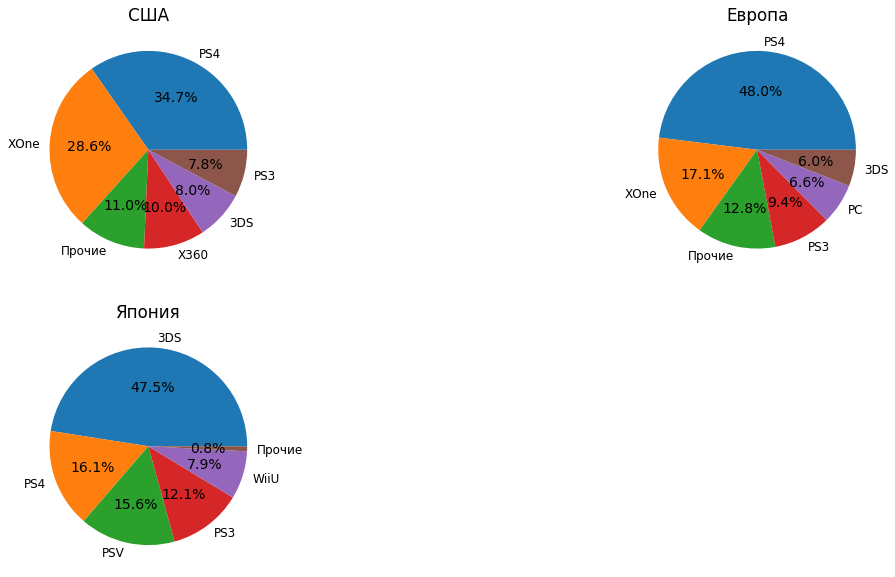

In [557]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.set_title('США')
ax2.set_title('Европа')
ax3.set_title('Япония')

ax1.pie(get_stat(data_actual, 'platform', columns)[0]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'platform', columns)[0].index)

ax2.pie(get_stat(data_actual, 'platform', columns)[1]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'platform', columns)[1].index)

ax3.pie(get_stat(data_actual, 'platform', columns)[2]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'platform', columns)[2].index)





plt.show()


#### Вывод

* Пользователи Европы и Северной Америки в основном играю на приставках Playstation и XBox
* Xbox в северной америке популярнее чем в европе;
* в европе и америке наиболее популярна платформа PS4;
* в целом, картина в Европе и Северной Америке не сильно отличается, разница только в долях платформ Playstation и Xbox, только одна портативная консоль в топе;
* в Европе и США ниболее популярны стационарные консоли;
* 3DS в западных странах занимает последнее место в топ 5 платформ;
* Япония кардинально отличается от западных стран:
    * наболее популярная платформа 3DS nintendo - портативная консоль - она занимает практически половину рынка - 47.5%;
    * в топ также входит портативные консоли PSV(Playstation Vita) и WiiU;
    * в топе нет Xbox, Японцы предпочитают консоли собственного производства.

### Самые популярные жанры для пользователей разных регионов

In [558]:
for data in get_stat(data_actual, 'genre', columns):
    display(data)  

,na_sales,sale_value
big_actual_genre,,
Shooter,79.019997,0.278181
Action,72.529999,0.255333
Sports,46.130001,0.162395
Прочие,37.860001,0.133282
Role-Playing,33.470001,0.117827
Misc,15.050000,0.052982


,eu_sales,sale_value
big_actual_genre,,
Action,74.680000,0.275898
Shooter,65.519997,0.242057
Sports,45.730000,0.168945
Прочие,42.450001,0.156827
Role-Playing,28.170000,0.104071
Racing,14.130000,0.052202


,jp_sales,sale_value
big_actual_genre,,
Role-Playing,31.16,0.334730
Action,29.58,0.317757
Прочие,15.50,0.166506
Fighting,6.37,0.068428
Misc,5.61,0.060264
Shooter,4.87,0.052315


In [559]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,big_platform,big_actual_platform,big_actual_genre
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,none,14.630000,Другие,PS4,Shooter
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001,Другие,PS4,Action
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,none,11.680000,Другие,3DS,Role-Playing
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.580000,Другие,PS4,Прочие
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,none,7.980000,Другие,PS4,Shooter


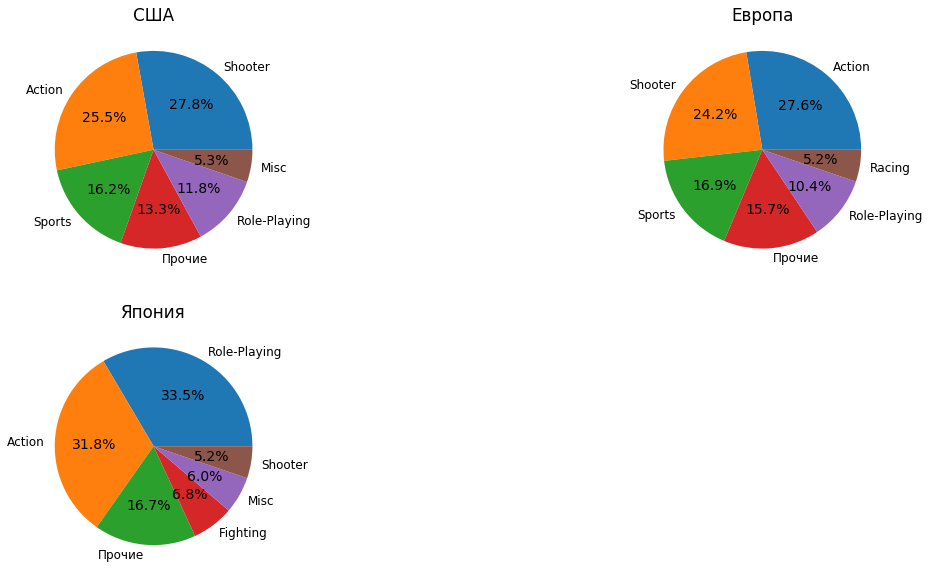

In [560]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.set_title('США')
ax2.set_title('Европа')
ax3.set_title('Япония')

ax1.pie(get_stat(data_actual, 'genre', columns)[0]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'genre', columns)[0].index)

ax2.pie(get_stat(data_actual, 'genre', columns)[1]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'genre', columns)[1].index)

ax3.pie(get_stat(data_actual, 'genre', columns)[2]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'genre', columns)[2].index)





plt.show()

#### Вывод

* Пользователи Северной Америки и Европы играют в одни и те же жанры;
* Четверть приходится на Action четверть на Shooter, седьмая часть на Sports, десятая часть на RP.
* продажи в Японии отличаются от западного мира:
    * Треть приходится на RP;
    * треть на Action;
    * далее распределено равномерно, примерно по 5%;
* различия между пользователями, видимо, связаны с абсолютно разной культорой в этих странах, Японцы предпочитают шутерам и спортивным играм - ролевые игры.

### Влияние рейтинга ESRB на продажи в отдельных регионах

In [561]:
for data in get_stat(data_actual, 'rating', columns):
        display(data)

,na_sales,sale_value
rating,,
M,96.419998,0.339435
none,64.720001,0.227839
E,50.740002,0.178624
T,38.950001,0.137119
E10+,33.230000,0.116982
AO,0.000000,0.000000


,eu_sales,sale_value
rating,,
M,93.440002,0.345205
none,58.950001,0.217785
E,58.060001,0.214497
T,34.070000,0.125868
E10+,26.160000,0.096645
AO,0.000000,0.000000


,jp_sales,sale_value
rating,,
none,56.900002,0.611236
T,14.780000,0.158771
E,8.940000,0.096036
M,8.010000,0.086046
E10+,4.460000,0.047911
AO,0.000000,0.000000


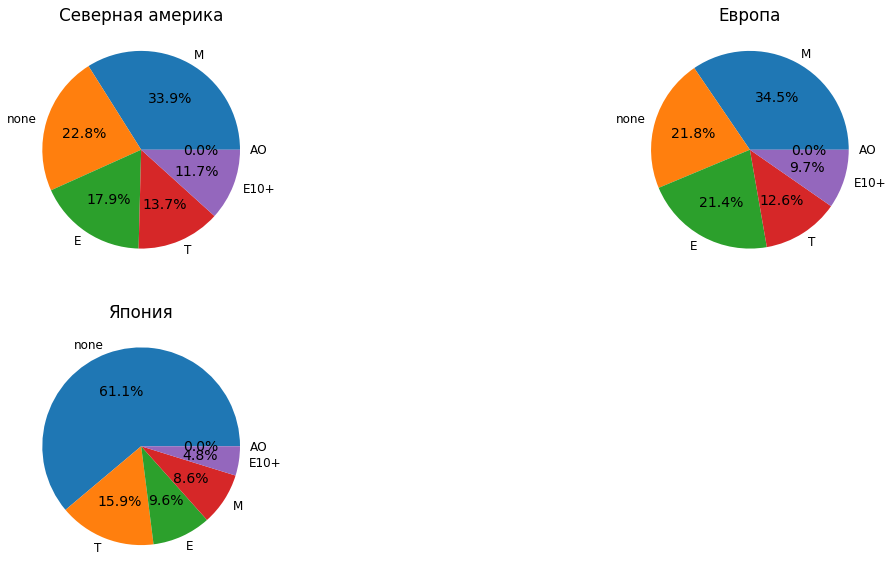

In [562]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.set_title('Северная америка')
ax2.set_title('Европа')
ax3.set_title('Япония')

ax1.pie(get_stat(data_actual, 'rating', columns)[0]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'rating', columns)[0].index)

ax2.pie(get_stat(data_actual, 'rating', columns)[1]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'rating', columns)[1].index)

ax3.pie(get_stat(data_actual, 'rating', columns)[2]['sale_value'],
        autopct='%1.1f%%', labels=get_stat(data_actual, 'rating', columns)[2].index)






plt.show()

#### Вывод

Описание рейтингов:
* E - для всех;
* E10+ - для всех от 10 лет;
* Т - подростки, от 13 лет;
* M - для взрослых 17+;
* AO - только 18+.
* none - пропуск;

* Для пользователей Северной Америки и Европы картина влияния рейтинга на продажи одинаковая:
    * больше всего продаж приходится на игры для взрослых 17+, 34%;
    * `none` занимает довольно большую часть, по 22 %;
    * затем идут игры для всех, около 18% в Америке и 21% в европе;
    * затем, примерно, по 13 и 10% игры для 10+ и 13+.
* в Японии картина отличается:
    * большая часть игр с пропусками в рейтинге - 61%, это отличает данный регион; 
    * далее идут игры для всех, 16%;
    * затем игры для 13+, 10%;
    * игры 17+ всего 9%;
    * и игры для 10+ - 5%.


Если не брать во внимание пропуски, то в северной америке  и европе наиболее популярны игры для 17+, а в Японии игры для всех. Но, если взять во внимание пропущенные значения в столбце `'rating'`, то оказывается, что доля игр с пропущенным рейтингом в европе и северной америке чуть больше 20%, а в Японии - большая часть проданных игр с пропуском в рейтинге, это отличает данный регион.

## Проверка статистических гипотез

Проверим гипотезы:
* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем необходимые дата фреймы и удалим пропуски в сформированных данных:

In [563]:
data_actual_xone = data_actual.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)
data_actual_pc = data_actual.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)
data_actual_xone.name = 'XOne'
data_actual_pc.name = 'PC'

In [564]:
data_actual_xone.dtype

dtype('float32')

Проверим размер выборки:

In [565]:
len(data_actual_xone)

165

In [566]:
len(data_actual_pc)

122

Напишем функцию для проверки гипотезы, будем использовать функцию `ttest_ind`, которая применяется для проверки гипотезы о равенстве средних двух генеральных совокупностей с помощью t-критерия, который применяется для проверки гипотезы о равенстве средних. Коэффициент значимости `alpha=0.01`:

In [567]:
def ttest(data1, data2, equal_param=True, alpha=.01):
    alpha = .01

    results = st.ttest_ind(data1, data2, equal_var=equal_param)
    
    print(f'Среднее для {data1.name} = {np.mean(data1)}')
    print(f'Среднее для {data2.name} = {np.mean(data2)}')
    
    print('p-значение:', results.pvalue)
    
    
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

Сформулируем гипотезы:
* `H0 - средние пользовательские рейтинги платформ Xbox One и PC равны;`
* `H1 - средние пользовательские рейтинги платформ Xbox One и PC не равны.`

Размер выборок почти одинаковый, можно сделать вывод, что дисперсии выборок, так что примем `equal_var=True`:

In [568]:
ttest(data_actual_xone, data_actual_pc)

Среднее для XOne = 6.594544410705566
Среднее для PC = 6.298360824584961
p-значение: 0.10450648637161196
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Отдаём предпочтение гипотезе о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем необходимые дата фреймы и удалим пропуски в сформированных данных:

In [569]:
data_actual_action = data_actual.query('genre == "Action"')['user_score'].dropna().reset_index(drop=True)
data_actual_sports = data_actual.query('genre == "Sports"')['user_score'].dropna().reset_index(drop=True)
data_actual_action.name = 'action'
data_actual_sports.name = 'sports'

Посчитаем размер выборок:

In [570]:
print(len(data_actual_action))
print(len(data_actual_sports))

297
127


Сформулируем гипотезы:
* `H0 - средние пользовательские рейтинги жанров Action и Sports равны;`
* `H1 - средние пользовательские рейтинги жанров Action и Sports не равны.`

Размер выборок сильно отличается, можно сделать вывод, что дисперсии выборок отличаются, так что примем `equal_var=False`:

In [571]:
ttest(data_actual_action, data_actual_sports, equal_param=False)

Среднее для action = 6.760605812072754
Среднее для sports = 5.225196838378906
p-значение: 1.1825639880196408e-14
Отвергаем нулевую гипотезу


#### Вывод

Отдаём предпочтение альтернативной гипотезе о том, что ссредние пользовательские рейтинги жанров Action и Sports не равны. При этом среднее выборки по Action - 6.76, а для Sports - 5.22.

## Общий вывод

* В ходе подготовки данных:
    * Названия столбцов были приведены к змеиному регистру;
    * дупликаты не были обнаружны;
    * были оптимизированы типы данных;
    * было решено оставить пропуски, чтобы не потерять лишние данные, и не заполнять их, чтобы не искажать общую картину;
    * пропуски столбце с рейтингом были заменены на `'none'`, чтобы не потерять их;
    * в столбце `'user_score'` значение `'tbd'` фактически означает пропуск, эти значения были заменены на `np.nan`;
    * посчитаны суммарные продажи по всем регионам для каждой игры.
* В ходе анализа данных мы сделали следующие выводы:
    * Из графика видно, что пик количества выпускаемых игр пришёлся на 2008-2009 годы;
    * количество игр, выпущенных до 1995 года исчезающе мало;
    * начиная с 2012 года количество выпускаемых игр было примерно одинаково в каждый год.
    * Из графиков видно, что среднее время жизни платформы составляет в среднем около 10 лет. При этом значимый объем продаж в среднем это 8 лет. Как правило, в первый и последний год продажи очень низкие;
    * За актуальный период приянт период с 2014 года;
    
    * Можно выделить платформы, которые находятся в завершающей стадии жизненного цикла, это:
        * Wii, продажи за 2016 год исчезающе малы;
        * PSP;
        * PS3;
        * X360;
    * Учитывая, что данные неполные и продажи за 2016 год занижены, а также, приняв во внимание жизненный цикл платформы в 10 лет, мы видим, что в 2015 относительно 2014 года был стремительный рост, поэтому платформы PS4 и Xbox One находятся, вероятно, в растущей или пиковой стадии развития и на следующий год можно ожидать прироста продаж относительно 2015 года или же таких же по объему;
    * остальные платформы, судя по графикам, находятся в нисходящем тренде, хотя и здесь не так однозначно, потому что, если учесть, что данные неполные, то такие платформы как PC и PSV могут показать относительно высокие продажи.
    * платформы, у которых можно ожидать относительно высокие продажи:
        * PS4;
        * XOne;
        * 3DS;
        * PC;
        * PSV;
        * WiiU;
    * лидеры по объему среди них:
        * PS4 - абсолютный лидер;
        * XOne - приблизительно вдвое меньше PS4;
        * 3DS - приблизительно втрое меньше PS4.
     * распределение продаж у всех платформ судя по диаграмме "Ящик с усами"  - распределение Пуассона. При этом у наиболее популярных платформ разброс, естественно, выше, встречаются супер хиты, которые во много раз превышают медианные продажи.

     * Большая часть игр продаётся тиражом не более 1,5 млн копий по всему миру. Медиана же как правило не больше 0.25 млн.

     * 75% игр расходится в среднем тиражом не более 0,75 млн на самых популярных платформах.

    * Можно выделить платформы с наибольшими медианными продажами:
        * PS4;
        * XOne;
        * WiiU;
    * Есть слабая корреляция между отзывами критиков и количеством продаж игр на платформе PS4;
    * корреляция между оценкой пользователей и количеством продаж - отсутствует.
    * в основном большие продажи есть у игр с оценкой критиков больше 70;
    * Наибольшее количество игр выпускается в жанре Action, наименьшее в жанре Puzzle;
    * наибольшее количество продаж в жанре Action, Shooter, наименьшее  - Puzzle, Strategy;
    * по показателю среднее количество продаж по жанру  - Shooter, Platform - лидеры, наименьшие показатели у Puzzle и Advennture.
    * стоит отметить жанр Adventure - большое количество выпускаемых игр, но при этом продаж по жанру очень мало;
    * жанр Shooter сильно выделяется по средним на игру продажам, относительно других жанров;
    * жанр Action несмотря на большое количество выпускаемых игр, по продажам на одну игру входит в пятерку лузеров.
* Анализ пользователей разных стран показал:
   * Пользователи Европы и Северной Америки в основном играю на приставках Playstation и XBox
    * Xbox в северной америке популярнее чем в европе;
    * в европе и америке наиболее популярна платформа PS4;
    * в целом, картина в Европе и Северной Америке не сильно отличается, разница только в долях платформ Playstation и Xbox, только одна портативная консоль в топе;
    * в Европе и США ниболее популярны стационарные консоли;
    * 3DS в западных странах занимает последнее место в топ 5 платформ;
    * Япония кардинально отличается от западных стран:
        * наболее популярная платформа 3DS nintendo - портативная консоль - она занимает практически половину рынка - 47.5%;
        * в топ также входит портативные консоли PSV(Playstation Vita) и WiiU;
        * в топе нет Xbox, Японцы предпочитают консоли собственного производства.
    * Пользователи Северной Америки и Европы играют в одни и те же жанры;
        * Четверть приходится на Action четверть на Shooter, седьмая часть на Sports, десятая часть на RP.
    * продажи в Японии отличаются от западного мира:
        * Треть приходится на RP;
        * треть на Action;
        * далее распределено равномерно, примерно по 5%;
    * различия между пользователями, видимо, связаны с абсолютно разной культорой в этих странах, Японцы предпочитают шутерам и спортивным играм - ролевые игры.
    
   * Для пользователей Северной Америки и Европы картина влияния рейтинга на продажи одинаковая:
        * больше всего продаж приходится на игры для взрослых 17+, 34%;
        * `none` занимает довольно большую часть, по 22 %;
        * затем идут игры для всех, около 18% в Америке и 21% в европе;
        * затем, примерно, по 13 и 10% игры для 10+ и 13+.
    * в Японии картина отличается:
        * большая часть игр с пропусками в рейтинге - 61%, это отличает данный регион; 
        * далее идут игры для всех, 16%;
        * затем игры для 13+, 10%;
        * игры 17+ всего 9%;
        * и игры для 10+ - 5%.


   * Если не брать во внимание пропуски, то в северной америке  и европе наиболее популярны игры для 17+, а в Японии игры для всех. Но, если взять во внимание пропущенные значения в столбце `'rating'`, то оказывается, что доля игр с пропущенным рейтингом в европе и северной америке чуть больше 20%, а в Японии - большая часть проданных игр с пропуском в рейтинге, это отличает данный регион.


* Проверка статистических гипотез показала, что:
    * Отдаём предпочтение гипотезе о равенстве средних пользовательских рейтингов платформ Xbox One и PC;
    * Отдаём предпочтение альтернативной гипотезе о том, что ссредние пользовательские рейтинги жанров Action и Sports не равны. При этом среднее выборки по Action - 6.76, а для Sports - 5.22.